In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
import tensorflow

from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

from tensorflow.keras.utils import img_to_array

from keras_preprocessing.image import load_img

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function= preprocess_input)
val_datagen = ImageDataGenerator(rescale= 1/255)

In [ ]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/dataset/New Plant Disease Dataset(Augmented)/train',target_size=(256,256),class_mode='categorical',batch_size=32)

x_val=val_datagen.flow_from_directory(r'/content/drive/MyDrive/dataset/New Plant Disease Dataset(Augmented)/valid',target_size=(256,256),class_mode='categorical',batch_size=32)

Found 46557 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img, label = x_train.next()

In [ ]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

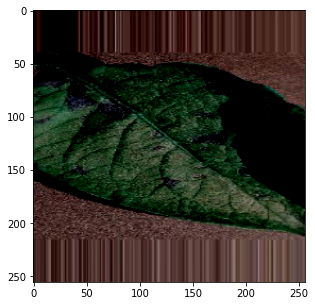

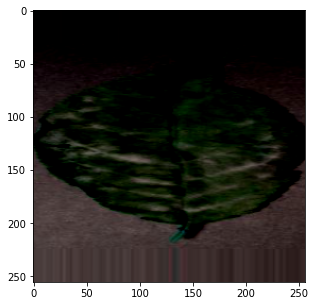

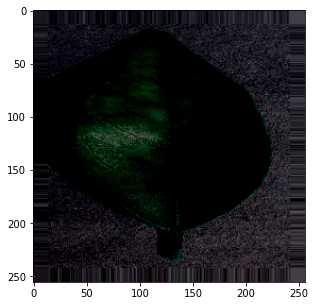

In [ ]:
plotImage(t_img[:3], label[:3])

In [ ]:
from keras.layers import Dense, Flatten 
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256, 256, 3), include_top = False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable= False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X = Flatten()(base_model.output)

X= Dense(units = 38, activation='softmax')(X)

#creating our model

model = Model(base_model.input, X)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
import tensorflow as tf
tf.keras.losses.CategoricalCrossentropy()
loss = 'categorical_crossentropy'
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

# Early stopping and model check points


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es= EarlyStopping(monitor= 'val_accuracy',min_delta=0.01, patience = 3, verbose = 1)
#model check point

mc= ModelCheckpoint(filepath ="best_model.h5", 
                    monitor= 'val_accuracy', 
                    min_delta=0.01, 
                    patience= 3, 
                    verbose = 1, 
                    save_best_only= True)
cb= [es, mc]

In [ ]:
his= model.fit_generator(x_train, steps_per_epoch = 16, epochs= 50, verbose= 1, callbacks= cb, validation_data= x_val, validation_steps = 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 10.3381 - accuracy: 0.5625 
Epoch 1: val_accuracy improved from -inf to 0.05273, saving model to best_model.h5
16/16 [==============================] - 794s 51s/step - loss: 10.3381 - accuracy: 0.5625 - val_loss: 13.2652 - val_accuracy: 0.0527
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 6.4153 - accuracy: 0.7148 
Epoch 2: val_accuracy improved from 0.05273 to 0.05469, saving model to best_model.h5
16/16 [==============================] - 806s 51s/step - loss: 6.4153 - accuracy: 0.7148 - val_loss: 15.7124 - val_accuracy: 0.0547
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 5.1874 - accuracy: 0.7695 
Epoch 3: val_accuracy improved from 0.05469 to 0.07227, saving model to best_model.h5
16/16 [==============================] - 800s 51s/step - loss: 5.1874 - accuracy: 0.7695 - val_loss: 14.0097 - val_accuracy: 0.0723
Epoch 4/50
16/16 [==============================] - ETA: 0s - 

In [ ]:
h= his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

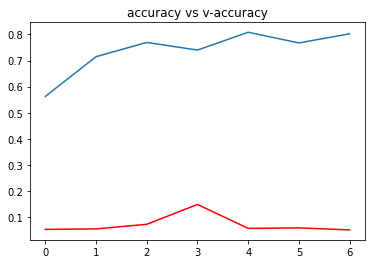

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= "red")
plt.title("accuracy vs v-accuracy")
plt.show()

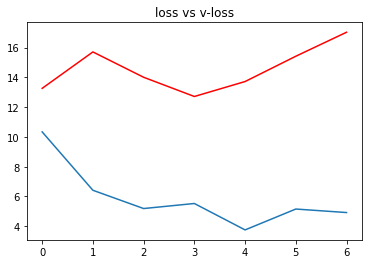

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#load best model
from keras.models import load_model
model= load_model("/content/best_model.h5")

In [ ]:
acc= model.evaluate_generator(x_val)[1]
print (f" the accuracy of your model ={acc*100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: ignored

In [ ]:
def prediction(path):
  img= load_img(path,target_size=(256, 256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img= np.expand_dims(im, axis=0)
  pred = np.argmax(model.predict(img))
  ref = dict(zip(list(x_train.class_indices.values()) , list(x_train.class_indices.keys())))
  print(f" the image belongs to{ref[pred]}")

In [ ]:
#prediction of images into numbers
path = "/content/drive/MyDrive/dataset/test/PotatoEarlyBlight1.JPG"
prediction(path)

1/1 [==============================] - 1s 794ms/step
 the image belongs toPotato___Early_blight


In [ ]:
ref = dict(zip(list(x_train.class_indices.values()) , list(x_train.class_indices.keys())))


{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '